# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


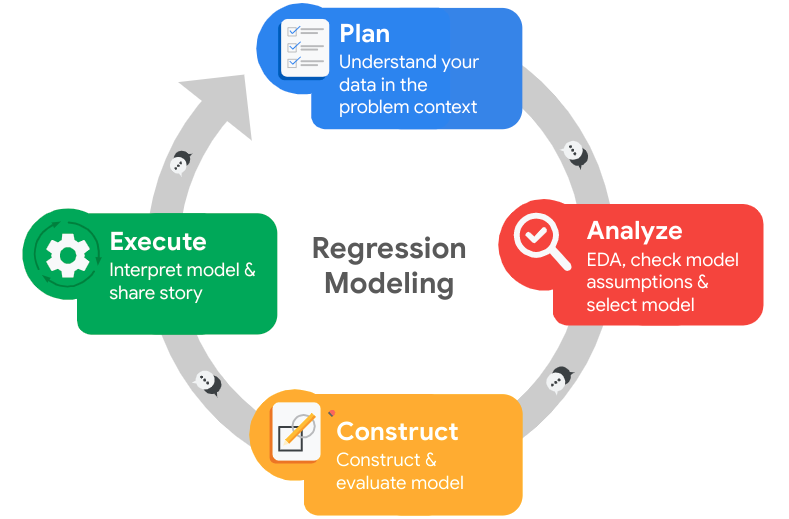

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1.<em> Who are your stakeholders for this project?</em>
 - The stakeholders are: 1) the leadership of the company; 2) HR Department; 3) Data Science team

2. <em>What are you trying to solve or accomplish?</em>
 - The main overall research question is: what’s likely to make the employee leave the company? We will try to answer this question by analyzing the survey data. We will also build an ML model predicting whether an employee is likely to leave the company or not.

3. <em>What are your initial observations when you explore the data?</em>
 - There are about 15k observations with 10 variables. There is a need to conduct EDA: 1) to detect any anomalies, missing values, and outliers; 2) to understand the distributions of the target and independent variables; 3) to identify any potential relationships between the target and independent variables.

4. <em>What resources do you find yourself using as you complete this stage? (Make sure to include the links.)</em>
 - The main resource will be materail from the Google Advanced Data Analytics Professional Certificate Program. Python documentation will also be consulted.

5. <em>Do you have any ethical considerations in this stage?</em>
 - How reliable is the data and how relaible will be the model in predicting employees who are likely to leave the company? What are the implications of false positives? What are the implications of false negatives? 

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from xgboost import plot_importance

import pickle

pd.set_option('display.max_columns', None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
print(df0.shape)
df0.info()

(14999, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'satisfaction_level': 'satisfaction','average_montly_hours': 'average_monthly_hours',
                   'time_spend_company' : 'tenure', 'Work_accident': 'work_accident', 'Department': 'department' }, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction             0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().value_counts()

False    11991
True      3008
dtype: int64

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated() == True]

,satisfaction,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head()

,satisfaction,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

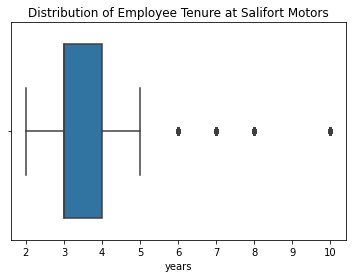

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(df['tenure'])
plt.title('''Distribution of Employee Tenure at Salifort Motors''')
plt.xlabel('years');
plt.show()


In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
outlier_threshold =  2.5*np.percentile(df['tenure'], 75) - 1.5*np.percentile(df['tenure'], 25)
#the formula above is equivalent to Q3 + 1.5*IQR

print('number of rows containing outliers for tenure is: ', df[df['tenure'] > outlier_threshold].shape[0])

number of rows containing outliers for tenure is:  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. <em>What did you observe about the relationships between variables?</em> 
 - The numerical variables in the dataset are not strongly correlated with each other. This is a good news if we are going to run a regression analysis since it means no multi-collinearity.
 
 - However, the independent variables are not strongly correlated with our target variable ('left') either. The top three independent variables associated with the target variable are employees' satisfaction level ('satisfaction'), their tenure ('tenure') and whether they had a work accident ('work_accident). The correlation coefficients between these variables and the target variable are -0.35, 0.17 and -0.13, respectively. Not surprisingly, employees with lower satisfaction levels were more likely to leave the company.

 - The average last evaluation scores were about the same between those who stayed at and those who left the company. However, the median evaluation scores were higher for those who left the company than the rest.
 
 - The average number of projects were also the same between these two groups of employees. However, about 25% of those who left had 6 or more projects, and only one among those who stayed had 6 projects.
 
 - Moreover, those who left on average worked longer hours than those who stayed (199 vs. 208 hours). The difference between group median values were even larger: 198 vs. 226 hours.
 
 - Turnover rate was essentially zero among those who worked less than 125 hours per month. The rate generally increased after that many hours. However, this increase was not linear. The rates were relatively high for those who worked between 125-168. It seems that this group worked less than a normal 8-hour workday. Then the rates declined sharply for those who worked between 168 and 210. After 210 hours, the turnover rate steadily declined, and almost all who worked longer than 290 hours per month left the company. This group of former employees seemed to be overworked (since if the data is true then they worked more than 10 hours per day). Thus, we can identify two types of employees who left the company: those who didn't work long enough and those who were overworked.
 
 - There was a non-linear relationship between tenure and the turnover rate as well. The rate steadily increase with tenure and became maximum at 5 years with the company. After that point it started to decline until becoming virtually zero among those who were with the company for longer than 7 years. 
 
 - Interestingly, those who had work accidents were more likely to stay than those who didn't.
 
 - Employees who were not promoted in the last 5 years were also more likely to leave. About 17% of those who were not promoted left, whereas the percentage was less than 4% for those who were promoted.
 
 - There was significant variation in the turnover rate between the departments of the company. HR and Accounting had the highest turnover rates (18.8% and 17.6%, respectively). Management (11.9%) and RandD (12.2%), on the other hand, had the lowest turnover rates.
 
 - Salary was negatively correlated with turnover. Higher salaried employees were less likely to leave the company that their lower paid colleagues.


2. <em>What do you observe about the distributions in the data?</em>
 - The distribution of the numerical independent variables does not seem to be significantly skewed. The only exception is the tenure variable, which is positively skewed, but its distribution is still what one would expect for such variable. The outliers of this variable are within a plausible range of values. 
 
 - About 17% (1,991 out of 11,991) of the employees in the dataset left the company. This means that the dataset is moderately imbalanced.
 
 - Although, average monthly work hours are not significantly skewed, they have some unusually high values. About 25% of the employees worked longer than 245 hour per month, which corresponds to an 11-hour workday. The maximum value was 310 hours. 
 

3. <em>What transformations did you make with your data? Why did you chose to make those decisions?</em>
 - Since tree-based ML models will be used for this project, there will not be a great need for transforming the data. However, if logistic regression is used, then some categorical variables (like department and salary) need to be encoded into binary variables.
 

4. <em>What are some purposes of EDA before constructing a predictive model?</em>
 - EDA can help us to detect duplicates, any missing or unusually large/small values.
 - It can also help to identify relationships between independent variable and the target variable.
 - It can help to check certain modeling assumptions like multicollinearity, normality of a variable distribution etc. 
 - Conducting EDA also includes formatting variables so that we are able to use them to build a model.
 
 
5. <em>What resources do you find yourself using as you complete this stage? (Make sure to include the links.)</em>
 - The materials from this certificate program.
 - Python documentation like pandas.crosstab (https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) and stats.chi2_contingency() (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)
 
6. <em>Do you have any ethical considerations in this stage?</em>
 - How reliable is the data and how relaible will be the model in predicting employees who are likely to leave the company? There are some unusually high values for average monthly work hours. However, tree-based ML models should be able to handle the outliers.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts(normalize = True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

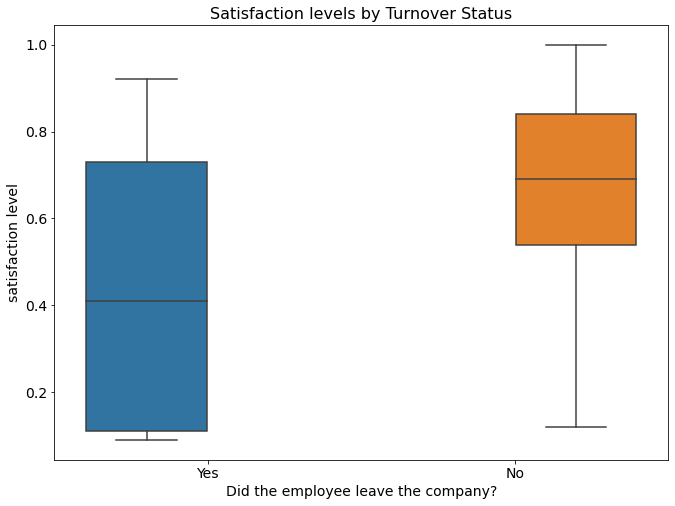

In [14]:
# Satisfaction levels by Turnover Status (left vs. satisfaction)
### YOUR CODE HERE ###
df['left_cat'] = df['left'].replace({0: 'No', 1:'Yes'})
plt.figure(figsize=(11,8))
sns.boxplot(data = df, x = 'left_cat', y = 'satisfaction' , hue = 'left_cat')
plt.legend(title='left', bbox_to_anchor=(1, 1), loc='upper right').set_visible(False)
plt.title('Satisfaction levels by Turnover Status', fontsize = 16)
plt.xlabel('Did the employee leave the company?', fontsize = 14)
plt.ylabel('satisfaction level', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show();

#df['satisfaction'].groupby(df['left']).mean() #0.667 for those who stayed and 0.44 for those who left. 

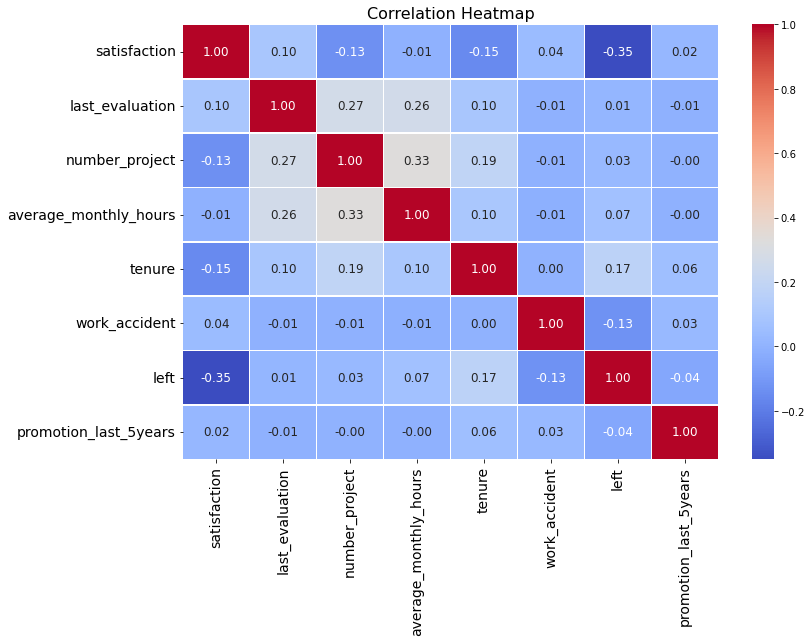

In [15]:
# Correlation between numeric variables (heatmap)
### YOUR CODE HERE ###
correlation_matrix = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, annot = True, annot_kws={"size": 12}, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Correlation Heatmap', fontsize = 16);

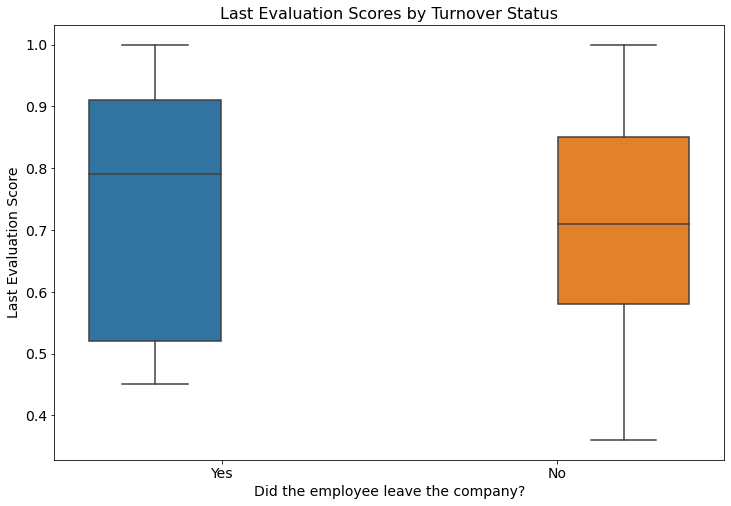

left
0    0.715667
1    0.721783
Name: last_evaluation, dtype: float64


left
0    0.71
1    0.79
Name: last_evaluation, dtype: float64

In [16]:
# Last Evaluation Scores by Turnover Status
### YOUR CODE HERE ###
plt.figure(figsize = (12,8))
sns.boxplot(data = df, x = 'left_cat', y = 'last_evaluation', hue = 'left_cat')
plt.title('Last Evaluation Scores by Turnover Status', fontsize = 16)
plt.xlabel('Did the employee leave the company?', fontsize = 14)
plt.ylabel('Last Evaluation Score', fontsize = 14)
plt.legend().set_visible(False)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

print(df['last_evaluation'].groupby(df['left']).mean())
df['last_evaluation'].groupby(df['left']).median()

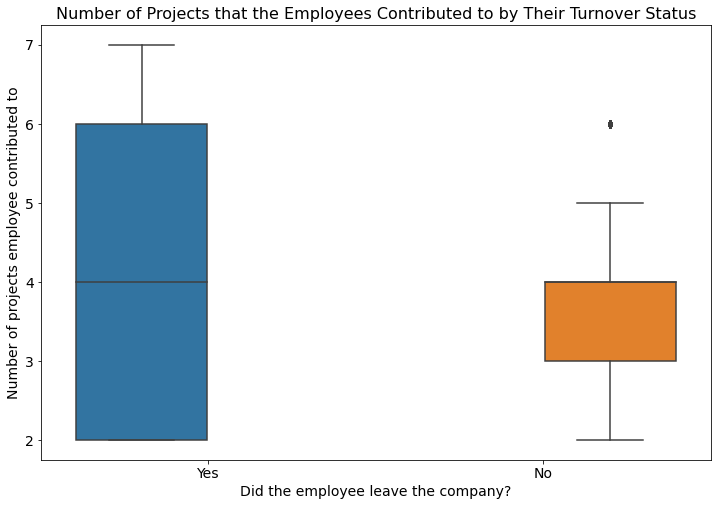

left
0    3.786800
1    3.883476
Name: number_project, dtype: float64


left
0    4.0
1    4.0
Name: number_project, dtype: float64

In [17]:
# Number of Projects by Turnover Status
### YOUR CODE HERE ###
plt.figure(figsize = (12,8))
sns.boxplot(data = df, x = 'left_cat', y = 'number_project', hue = 'left_cat')
plt.legend().set_visible(False)
plt.title('Number of Projects that the Employees Contributed to by Their Turnover Status', fontsize = 16)
plt.xlabel('Did the employee leave the company?', fontsize = 14)
plt.ylabel( 'Number of projects employee contributed to', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

print(df['number_project'].groupby(df['left']).mean())
df['number_project'].groupby(df['left']).median()

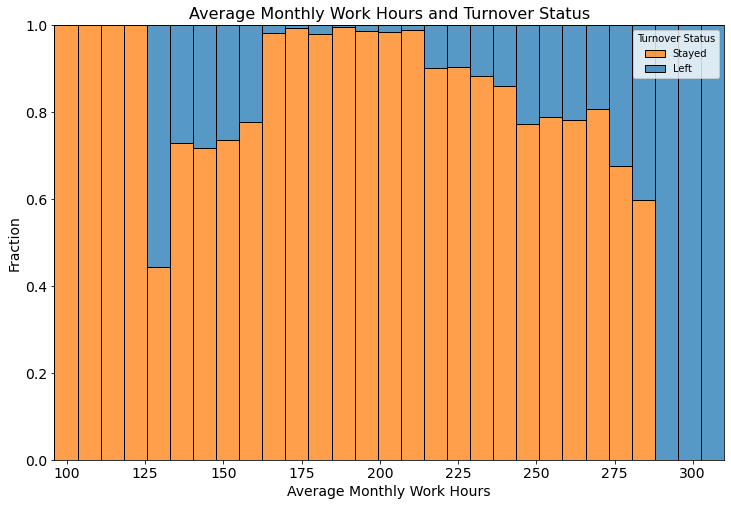

In [18]:
# Average Monthly Work Hours and Turnover Status (Figure 1)
### YOUR CODE HERE ###
plt.figure(figsize = (12,8))
sns.histplot(data = df, x = 'average_monthly_hours', hue = 'left_cat', multiple ='fill', kde = False)
plt.title('Average Monthly Work Hours and Turnover Status', fontsize = 16)
plt.ylabel('Fraction', fontsize = 14)
plt.xlabel('Average Monthly Work Hours', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(labels = ['Stayed', 'Left'], title = "Turnover Status")
plt.show()

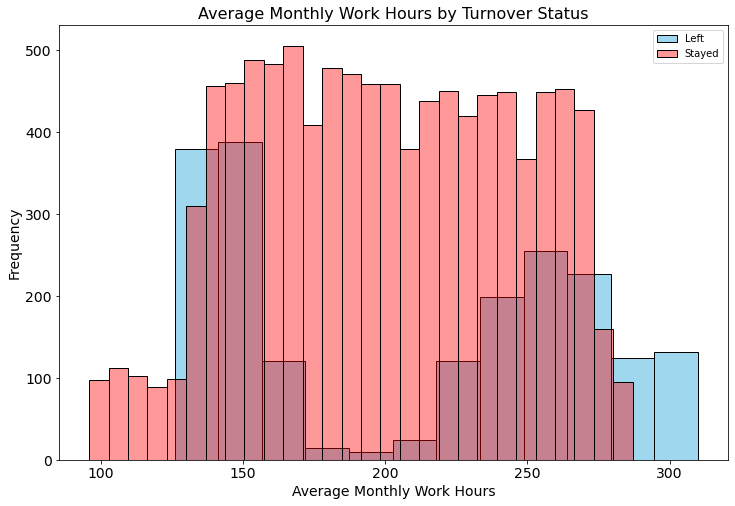

left
0    198.94270
1    208.16223
Name: average_monthly_hours, dtype: float64


left
0    198.0
1    226.0
Name: average_monthly_hours, dtype: float64

In [19]:
# Average Monthly Work Hours and Turnover Status (Figure 2)
### YOUR CODE HERE ###
plt.figure(figsize = (12,8))
sns.histplot(data = df[df['left'] == 1], x = 'average_monthly_hours', color = 'skyblue', alpha = 0.8,
             label = 'Work Hours of Those Who Left')
sns.histplot(data = df[df['left'] == 0], x = 'average_monthly_hours', color = 'red', alpha = 0.4,
            label = 'Work Hours of Those Who Stayed')
plt.title('Average Monthly Work Hours by Turnover Status', fontsize = 16)
plt.xlabel('Average Monthly Work Hours', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(labels = ['Left', 'Stayed'])
plt.show()

print(df['average_monthly_hours'].groupby(df['left']).mean())
df['average_monthly_hours'].groupby(df['left']).median()

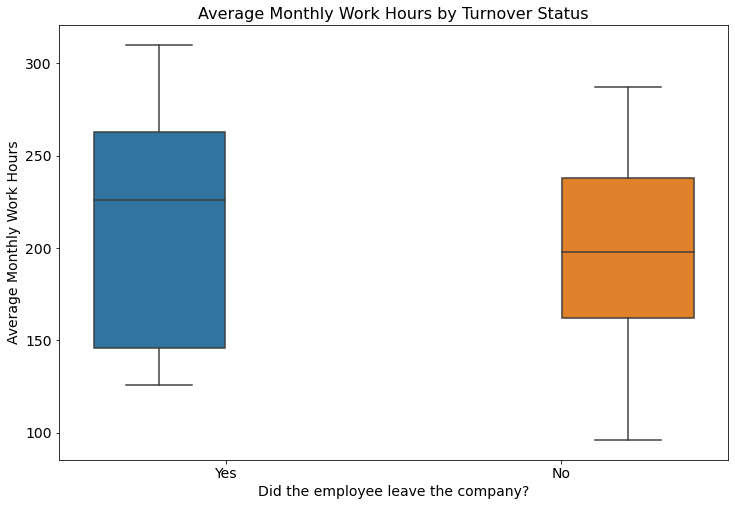

In [20]:
# Average Monthly Work Hours and Turnover Status (Figure 3)
### YOUR CODE HERE ###
plt.figure(figsize = (12,8))
sns.boxplot(data = df, x = 'left_cat', y = 'average_monthly_hours', hue = 'left_cat')
plt.legend().set_visible(False)
plt.title('Average Monthly Work Hours by Turnover Status', fontsize = 16)
plt.xlabel('Did the employee leave the company?', fontsize = 14)
plt.ylabel( 'Average Monthly Work Hours', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

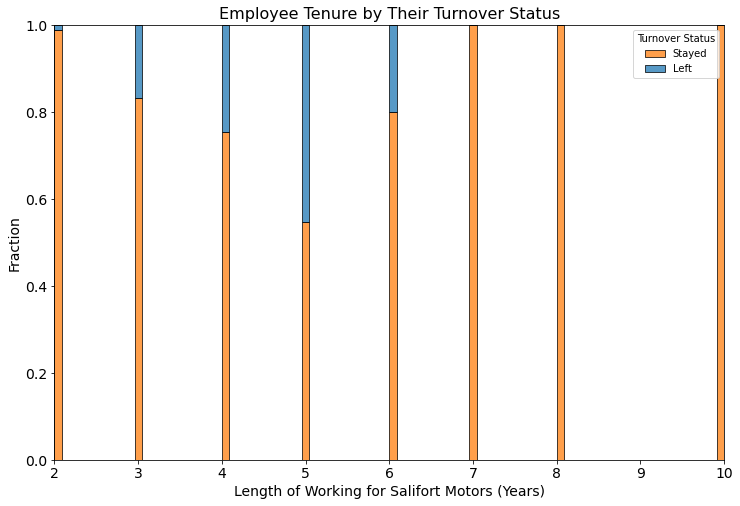

left
0    3.0
1    4.0
Name: tenure, dtype: float64

In [21]:
# Employee Tenure by Their Turnover Status (Figure 1)
### YOUR CODE HERE ###
plt.figure(figsize = (12,8))
sns.histplot(data = df, x = 'tenure', hue = 'left_cat', multiple = 'fill', kde = False)
plt.title('Employee Tenure by Their Turnover Status', fontsize = 16)
plt.ylabel('Fraction', fontsize = 14)
plt.xlabel('''Length of Working for Salifort Motors (Years)''', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(labels = ['Stayed', 'Left'], title = 'Turnover Status', loc = 'upper right')
plt.show()

df['tenure'].groupby(df['left']).median()

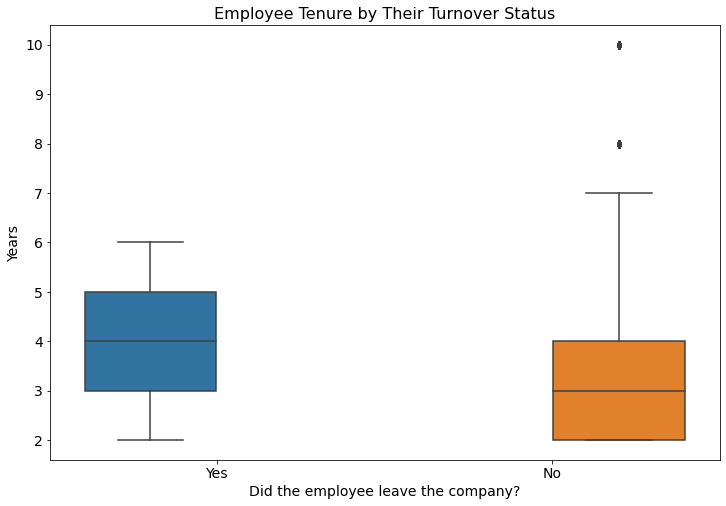

In [22]:
# Employee Tenure by Their Turnover Status (Figure 2)
### YOUR CODE HERE ###
plt.figure(figsize = (12,8))
sns.boxplot(data = df, x = 'left_cat', y = 'tenure', hue = 'left_cat')
plt.title('Employee Tenure by Their Turnover Status', fontsize = 16)
plt.ylabel('Years', fontsize = 14)
plt.xlabel('''Did the employee leave the company?''', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend().set_visible(False);

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
crosstab = pd.crosstab(df['work_accident'], df['left'], normalize = False)
print(crosstab)

crosstab_normalized = pd.crosstab(df['work_accident'], df['left'], normalize = 'index')
print(crosstab_normalized)

stats.chi2_contingency(crosstab)

left              0     1
work_accident            
0              8255  1886
1              1745   105
left                  0         1
work_accident                    
0              0.814022  0.185978
1              0.943243  0.056757


(187.7378344525747,
 9.911242628423175e-43,
 1,
 array([[8457.17621549, 1683.82378451],
        [1542.82378451,  307.17621549]]))

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
crosstab_prom = pd.crosstab(df['promotion_last_5years'], df['left'])
print(crosstab_prom)
print(stats.chi2_contingency(crosstab_prom))

pd.crosstab(df['promotion_last_5years'], df['left'], normalize = 'index')

left                      0     1
promotion_last_5years            
0                      9805  1983
1                       195     8
(22.992127549276592, 1.6266615348676462e-06, 1, array([[9830.70636311, 1957.29363689],
       [ 169.29363689,   33.70636311]]))


left,0,1
promotion_last_5years,,
0,0.831778,0.168222
1,0.960591,0.039409


In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
crosstab_dep = pd.crosstab(df['department'], df['left'])
print(crosstab_dep)
print(stats.chi2_contingency(crosstab_dep))

pd.crosstab(df['department'], df['left'], normalize = 'index')


left            0    1
department            
IT            818  158
RandD         609   85
accounting    512  109
hr            488  113
management    384   52
marketing     561  112
product_mng   576  110
sales        2689  550
support      1509  312
technical    1854  390
(20.857513153795892, 0.01329832963300122, 9, array([[ 813.94379118,  162.05620882],
       [ 578.76740889,  115.23259111],
       [ 517.88841631,  103.11158369],
       [ 501.20924026,   99.79075974],
       [ 363.60603786,   72.39396214],
       [ 561.25427404,  111.74572596],
       [ 572.09573847,  113.90426153],
       [2701.19256109,  537.80743891],
       [1518.63897923,  302.36102077],
       [1871.40355266,  372.59644734]]))


left,0,1
department,,
IT,0.838115,0.161885
RandD,0.877522,0.122478
accounting,0.824477,0.175523
hr,0.811980,0.188020
management,0.880734,0.119266
marketing,0.833581,0.166419
product_mng,0.839650,0.160350
sales,0.830195,0.169805
support,0.828666,0.171334


In [26]:
# Create a plot as needed
### YOUR CODE HERE ###
crosstab_sal = pd.crosstab(df['salary'], df['left'])
print(crosstab_sal)

print(stats.chi2_contingency(crosstab_sal))
pd.crosstab(df['salary'], df['left'], normalize = 'index')

left       0     1
salary            
high     942    48
low     4566  1174
medium  4492   769
(175.21071935727466, 8.984123357404531e-39, 2, array([[ 825.61921441,  164.38078559],
       [4786.92352598,  953.07647402],
       [4387.45725961,  873.54274039]]))


left,0,1
salary,,
high,0.951515,0.048485
low,0.795470,0.204530
medium,0.853830,0.146170


### Insights

- About 17% (1,991 out of 11,991) of the employees in the dataset left the company. This means that the dataset is moderately imbalanced.

- The top three numerical independent variables associated with the target variable are employees' satisfaction level ('satisfaction'), their tenure ('tenure') and whether they had a work accident ('work_accident). The correlation coefficients between these variables and the target variable are -0.35, 0.17 and -0.13, respectively. Not surprisingly, employees with lower satisfaction levels were more likely to leave the company.

- The average last evaluation scores were about the same between those who stayed at and those who left the company. However, the median evaluation scores were higher for those who left the company than the rest.
 
- The average number of projects were also the same between these two groups of employees. However, about 25% of those who left had 6 or more projects, and only one among those who stayed had 6 projects.
 
- Moreover, those who left on average worked longer hours than those who stayed (199 vs. 208 hours). The difference between group median values were even larger: 198 vs. 226 hours.
 
- Turnover rate was essentially zero among those who worked less than 125 hours per month. The rate generally increased after that many hours. However, this increase was not linear. The rates were relatively high for those who worked between 125-168. It seems that this group worked less than a normal 8-hour workday. Then the rates declined sharply for those who worked between 168 and 210. After 210 hours, the turnover rate steadily declined, and almost all who worked longer than 290 hours per month left the company. This group of former employees seemed to be overworked (since if the data is true then they worked more than 10 hours per day). Thus, we can identify two types of employees who left the company: those who didn't work long enough and those who were overworked.
 
- There was a non-linear relationship between tenure and the turnover rate as well. The rate steadily increase with tenure and became maximum at 5 years with the company. After that point it started to decline until becoming virtually zero among those who were with the company for longer than 7 years. 
 
- Interestingly, those who had work accidents were more likely to stay than those who didn't.
 
- Employees who were not promoted in the last 5 years were also more likely to leave. About 17% of those who were not promoted left, whereas the percentage was less than 4% for those who were promoted.
 
- There was some variation in the turnover rate between the departments of the company. HR and Accounting had the highest turnover rates (18.8% and 17.6%, respectively). Management (11.9%) and RandD (12.2%), on the other hand, had the lowest turnover rates.
 
- Salary was negatively correlated with turnover. Higher salaried employees were less likely to leave the company that their lower paid colleagues.

- The distribution of the numerical independent variables does not seem to be significantly skewed. The only exception is the tenure variable, which is positively skewed, but its distribution is still what one would expect for such variable. The outliers of this variable are within a plausible range of values. 
 
- Although, average monthly work hours are not significantly skewed, they have some unusually high values. About 25% of the employees worked longer than 245 hour per month, which corresponds to an 11-hour workday. The maximum value was 310 hours. 
 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. <em>Do you notice anything odd? </em>
 - The average monthly work hours for a lot of employees seem to be very high. About 25% of the employees worked longer than 245 hour per month, which corresponds to an 11-hour workday. The maximum value was 310 hours.
 - Many independent variables were weakly or moderately correlated with the target variable. However, upon closer inspection, it seems that most of these variables are associated with the dependent variable in a non-linear fashion.
 - Work accidents were negatively correlated with the target variable. This was surprising since those who had work accidents were more likely to stay than those who didn't.
 

2. <em>Which independent variables did you choose for the model and why?</em>
 - EDA suggested that most independent variables may have predictive power. Therefore, all independent variables were used in the model. This inolved some feature transformation since we had to encode some categorical variables (like 'department' and 'salary') into binary variables.
 
 
3. <em>Are each of the assumptions met?</em>
 - Random Forest and Extreme Gradient Boosting models that we used are tree-based models. Unlike, regression models, these models are fairly robust to outliers and do not require assumptions like multi-collinearity and normality.
 

4. <em>How well does your model fit the data?</em>
 - The models had fairly high recall, f1, precision and accuracy scores. All these metrics were well above 90%. The chapmion model had about 93% recall, about 95% f1, over 97% precision and over 98% accuracy scores when tested with the validation dataset. This means that the model fits the data well.
 
 
5. <em>Can you improve it? Is there anything you would change about the model?</em>
 - Conducting furhter hyperparameter tuning may imporve the model. Hyperparameter tuning can include decreasing the classification probability threshold. This might improve the performance, but the model already yields fairly well evaluation metrics. Adding more independent variables may improve the model even more.
 
 
6. <em>What resources do you find yourself using as you complete this stage? (Make sure to include the links.)</em>
 - The materials from this certificate program.
 - Python documentation like pd.concat(), RandomForestClassifier and XGVClassifier.
 

7. <em>Do you have any ethical considerations in this stage?</em>
 - How reliable is the data and how relaible will be the model in predicting employees who are likely to leave the company?
 - What are the implications of false positives?
 - What are the implications of false negatives?


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

We need to predict whether an employee will leave the company or not based on characteristics that we have in our dataset. 

### Identify the types of models most appropriate for this task.

We can use logistic regression since the target variable is a binary variable. However, it might be better to use Random Forest (RF) or Extreme Gradient Boosting (XGB) Classifier Models.

### Modeling

Add as many cells as you need to conduct the modeling process.

#### Random Forest 

In [27]:
#Logit Model
### YOUR CODE HERE ###
'''df_logit = pd.get_dummies(df, drop_first = True)

y = df_logit['left']
X = df_logit.copy()
X.drop(['left_cat_Yes', 'left'], inplace = True, axis = 1)
X.info()'''

"df_logit = pd.get_dummies(df, drop_first = True)\n\ny = df_logit['left']\nX = df_logit.copy()\nX.drop(['left_cat_Yes', 'left'], inplace = True, axis = 1)\nX.info()"

In [28]:
#Splitting Data into Train, Validation and Test sets (60/20/20)
### YOUR CODE HERE ###
'''X_train, X_test, y_train,  y_test = train_test_split(X, y, random_state = 42, test_size = 0.20, stratify = y)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state = 42, test_size = 0.25, stratify = y_train)'''

'X_train, X_test, y_train,  y_test = train_test_split(X, y, random_state = 42, test_size = 0.20, stratify = y)\n\nX_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state = 42, test_size = 0.25, stratify = y_train)'

In [29]:
### YOUR CODE HERE ###
'''clf = LogisticRegression(penalty = 'none').fit(X_train, y_train)
'''
#Because of Python sklearn version incompatibility logit model returned an error and did not run.

"clf = LogisticRegression(penalty = 'none').fit(X_train, y_train)\n"

In [30]:
#Random Forest 
### YOUR CODE HERE ###
df = pd.get_dummies(df, drop_first = True)

y = df['left']
X = df.copy()
X.drop(['left_cat_Yes', 'left'], inplace = True, axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction            11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   promotion_last_5years   11991 non-null  int64  
 7   department_RandD        11991 non-null  uint8  
 8   department_accounting   11991 non-null  uint8  
 9   department_hr           11991 non-null  uint8  
 10  department_management   11991 non-null  uint8  
 11  department_marketing    11991 non-null  uint8  
 12  department_product_mng  11991 non-null  uint8  
 13  department_sales        11991 non-null  uint8  
 14  department_support      11991 non-null

In [31]:
#Splitting Data into Train, Validation and Test sets (60/20/20)
### YOUR CODE HERE ###
X_tr, X_test, y_tr,  y_test = train_test_split(X, y, random_state = 42, test_size = 0.20, stratify = y)

X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, random_state = 42, test_size = 0.25, stratify = y_tr)

In [32]:
for x in [X_train, X_val,  X_test]:
    print(len(x))

7194
2398
2399


In [33]:
#Random Forest
### YOUR CODE HERE ###
#1. Instantiate the model object
rf = RandomForestClassifier(random_state = 42)

#2. Dictionary of Hyperparameters for Tuning
cv_params = {'max_depth': [3, 6, None],
            'max_features': [4, 8, None],
            'max_samples': [0.5, None],
            'min_samples_split': [2, 3, 4],
            'min_samples_leaf': [1, 2, 4],
            'n_estimators': [100, 125]}

#3.Dictionary for Scoring Metrics
scoring = {'accuracy', 'precision', 'recall', 'f1'}

#4. GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = 'recall')

In [34]:
#Fitting RF model
### YOUR CODE HERE ###
#rf_cv.fit(X_train,y_train)

In [35]:
#Pickling the RF model
### YOUR CODE HERE ###
path = '/home/jovyan/work/'
#with open(path +'rf_cv_model.pickle', 'wb') as to_write:
#    pickle.dump(rf_cv, to_write)

In [36]:
### YOUR CODE HERE ###
with open(path + 'rf_cv_model.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

In [37]:
#Best RF model score and parameters
### YOUR CODE HERE ###
print(rf_cv.best_score_)
rf_cv.best_params_


0.9138010370137595


{'max_depth': 6,
 'max_features': None,
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [38]:
### YOUR CODE HERE ###
def make_results(model_name:str, model_object, metric:str):
    
    '''Arguments:
        model_name (string): what you want the model to be called in the output table,
        model_object: a fit GridSearchCV object,
        metric (string): precision, recall, f1, or accuracy,

        Returns a pandas df with the F1, recall, precision, and accuracy scores
        for the model with the best mean 'metric' score across all validation folds.'''
    
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_map = {'f1' : 'mean_test_f1',
                 'recall': 'mean_test_recall',
                 'precision': 'mean_test_precision',
                 'accuracy': 'mean_test_accuracy'}
    
    # Get all the results from the CV and put them in a df
    cv_results =pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_map[metric]].idxmax(), :]
    
    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                         'F1': [f1],
                         'Recall': [recall],
                         'Precision': [precision],
                         'Accuracy': [accuracy]
                         })
    return table
    

In [39]:
#Viewing the RF model results
### YOUR CODE HERE ###
rf_cv_results = make_results('Random Forest CV', rf_cv, 'recall')
rf_cv_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.939638,0.913801,0.967303,0.980539


#### XG Boost Model

In [40]:
#XG Boost Model
### YOUR CODE HERE ###
#1. Instantiate the model object
xgb = XGBClassifier(objective = 'binary:logistic',random_state = 42)

#2. Dictionary of Hyperparameters for Tuning
cv_params = {'max_depth': [3, 6, None],
            'min_child_weight': [1, 3, 5],
             'learning_rate': [0.1, 0.2, 0.3],
            'n_estimators': [100, 125]}

#3.Dictionary for Scoring Metrics - We will use the same as for RF model

#4. GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 4, refit = 'recall')

In [41]:
#Fitting XGB model
### YOUR CODE HERE ###
#xgb_cv.fit(X_train, y_train)

In [42]:
#Pickling the model
### YOUR CODE HERE ###
#with open(path + 'xgb_cv_model.pickle', 'wb') as to_write:
#    pickle.dump(xgb_cv, to_write)

In [43]:
### YOUR CODE HERE ###
with open(path + 'xgb_cv_model.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

In [44]:
#Best XGB model score and parameters
### YOUR CODE HERE ###
print(xgb_cv.best_score_)
xgb_cv.best_params_

0.9179816390204485


{'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 125}

In [45]:
#Comparing the fitted models
### YOUR CODE HERE ###
xgb_cv_results = make_results('XG Boost CV', xgb_cv, 'recall')
comparison_results = pd.concat([rf_cv_results, xgb_cv_results])
comparison_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.939638,0.913801,0.967303,0.980539
0,XG Boost CV,0.941131,0.917982,0.966200,0.980956


### Model Selection 

In [46]:
def get_test_scores(model_name: str, preds, y_test_data):
    
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data
    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    f1 = f1_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    
    table = pd.DataFrame({'Model' : [model_name],
                        'F1': [f1],
                        'Recall': [recall],
                        'Precision': [precision],
                        'Accuracy': [accuracy]})
    return table

In [47]:
#Testing the Models with the Validation Data Set 
#Random Forest Model
rf_cv_val_preds = rf_cv.predict(X_val)
rf_cv_val_results = get_test_scores('Random Forest CV Validated', rf_cv_val_preds, y_val)
comparison_results = pd.concat([comparison_results, rf_cv_val_results])

#XGB Model
xgb_cv_val_preds = xgb_cv.predict(X_val)
xgb_cv_val_results = get_test_scores('XG Boost CV Validated', xgb_cv_val_preds, y_val)
comparison_results = pd.concat([comparison_results, xgb_cv_val_results], ignore_index = True)

comparison_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.939638,0.913801,0.967303,0.980539
1,XG Boost CV,0.941131,0.917982,0.966200,0.980956
2,Random Forest CV Validated,0.947503,0.929648,0.966057,0.982902
3,XG Boost CV Validated,0.949936,0.929648,0.971129,0.983736


When testing with the validation dataset, both models yielded the same recall score of 93%. However, XGB model had slightly higher f1, precision and accuracy scores. Thus, while it is a very close call, XGB model did slightly better and we will use it as out main prediction model. 

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. <em>What key insights emerged from your model(s)?</em>
 - Top five predictive features of the employees' turnover are 1) job satisfaction, 2) average monthly work hours, 3) last evaluation scores, 4) number of projects and 5) tenure.
  - Those who left the company were most likely to be overworked or underworked, had lower job satisfaction, and contributed to more projects.
  - Interestingly, those who left also had slightly higher last evaluation scores. The median last evaluation score was 0.79 for them, whereas for those who stayed it was 0.71.
 - All the other features had relatively lower importance scores in the XGB model. The independent variables with the lowest feature importance were salary levels, promotion in the last 5 years and department.
  - Low level of salary had more feature importance than the medium level. In other words, the employees with the low salary levels were more likely to leave than those with the higher or medium levels. 
 - While there was some variation in the turnover rate between the department, employees' department had lowest feature importance in the model.This means that factors affecting the turnover are more or less the same across the departments.
 - Among the department variables RandD had the highest feature importance. This may not be surprising since it has one of the lowest turnover rates.  
 - Both models predicted the turnover status fairly well. The XGB model had the following evaluation metric scores: recall = 0.93%, f1 = 94%, precision = 95%, accuracy = 98%. The RF model had slightly worse than the XGB model when tested with the validation dataset, but it had slightly higher scores when the test dataset was used. Therefore, either model can be used for the prediction.


2. <em>What business recommendations do you propose based on the models built?</em>
 - Make sure that the employees do not work 'crazy' hours of more than 11 hours per day or work less than 6 hours per day. Based on the EDA, the "optimal" average monthly work hours would be within 168 -210 hours. At this range the turnover rate is minimal.
 - Having "optimal" average monthly work hours would also mean less number of projects.
 - Keep track of employees who have high evaluation scores but low job satisfaction. Figure out why these employees have low satisfaction levels. Can they be promoted and/or have a raise?
 - Also make sure that these employees have at least medium level of salaries.
 - Figure out what factors help the RandD department to have the lowest turnover rates, and see if it is possible to apply these factors to the other departments.
 
 
3. <em>What potential recommendations would you make to your manager/company?</em>
 - If tunrover is an important enough problem for the company, then using the model regularly (maybe once or twice a year) identify the employees who are likely to leave and figure out what can be done to improve their work satisfaction.
 - Make sure that the employees are neither underworked nor overworked.
 
 
4. <em>Do you think your model could be improved? Why or why not? How?</em>
 - The model had fairly high recall, f1, precision and accuracy scores. All these metrics were well above 90%. The chapmion model had about 93% recall, about 94% f1, over 95% precision and over 98% accuracy scores when tested with the test dataset. This means that the model fits the data well. 
 - Conducting furhter hyperparameter tuning may imporve the model. Hyperparameter tuning can include decreasing the classification probability threshold or increasing the number of estimators. Adding more independent variables (say gender and age) may also improve the model. However, marginal cost of further improving the model may not worth its benefits since the model already predicts the turnover fairly well.
 
 
5. <em>Given what you know about the data and the models you were using, what other questions could you address for the team?</em>
 - Can the model be further improved by conducting additional hyperparameter tuning (say by increasing the number of estimators)?
 - What factors are associated with satisfactions? (We can run a regression analysis with 'satisfaction' as a dependent variable)?
 - Are there differences in job satisfactrion between salary levels and departments? (We can run one-way and two-way ANOVA)
 - Which department has higher work accident rates?
 - Do employees with high tenure (> 6 years) work less hours than the rest?
 - What percent of those who left were promoted in the last 5 years?
 - Who are likely to be promoted? We can build a model predicting an employee's promotion likelihood.


6. <em>What resources do you find yourself using as you complete this stage? (Make sure to include the links.)</em>
 - Mostly the materials from this certificate program.
 - Python documentation like confusion matrix (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), blogs on plot_importance (https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/).
 
 
7. <em>Do you have any ethical considerations in this stage?</em>
 - The use of the model can lead to an ethical dilemma. By using the model the managment can identify the employees who are likely to leave and can take measures to improve their work satisfaction. On one hand, this may help to reduce the turnover. However, if these measures are only directed to those employees, then it may be or may perceived to be unfair toward the rest of the employees. 

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [48]:
### YOUR CODE HERE ###
xgb_cv_test_preds = xgb_cv.predict(X_test)

xgb_cv_test_results = get_test_scores('XG Boost CV Test', xgb_cv_test_preds, y_test)

xgb_cv_test_results

,Model,F1,Recall,Precision,Accuracy
0,XG Boost CV Test,0.94028,0.929648,0.951157,0.980409


In [49]:
### YOUR CODE HERE ###
rf_cv_test_preds = rf_cv.predict(X_test)

rf_cv_test_results = get_test_scores('RF CV Test', rf_cv_test_preds, y_test)

rf_cv_test_results

,Model,F1,Recall,Precision,Accuracy
0,RF CV Test,0.948718,0.929648,0.968586,0.983326


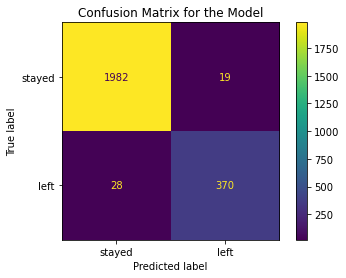

In [50]:
#Confusion Matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_test, xgb_cv_test_preds, labels = xgb_cv.classes_)
disp =ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['stayed', 'left'])
disp.plot(values_format = '')
plt.title('Confusion Matrix for the Model');

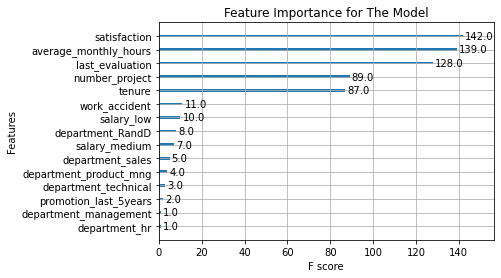

In [51]:
#Feature Importance
### YOUR CODE HERE ###
plot_importance(xgb_cv.best_estimator_)
plt.title('Feature Importance for The Model');

### Summary of model results

- Both models predicted the turnover status fairly well. The XGB model had the following evaluation metric test scores: recall = 0.93%, f1 = 94%, precision = 95%, accuracy = 98%. The RF model performed slightly worse than the XGB model when tested with the validation dataset, but it had slightly higher scores when the test dataset was used. Therefore, either model can be used for the prediction.

- When XGB model was tested with a sample of 2399, it predicted 1982 true negatives, 370 true positives, 28 false negatives and 19 false positives.

- Top five predictive features of the employees' turnover are 1) job satisfaction, 2) average monthly work hours, 3) last evaluation scores, 4) number of projects and 5) tenure.

- All the other features had relatively lower importance scores in the XGB model. The independent variables with the lowest feature importance were salary levels, promotion in the last 5 years and department.

- While there was some variation in the turnover rate between the department, employees' department had lowest feature importance in the model.This means that factors affecting the turnover are more or less the same across the departments.

- Among the department variables RandD had the highest feature importance. This may not be surprising since it has one of the lowest turnover rates. 

### Conclusion, Recommendations, Next Steps

#### Conclusion
- While XGB model performed slightly better during cross-validation process and with the validation datset, both models (RF and XGB) predicted the turnover status fairly well. Therefore, either model can be used for the prediction.
- Top five predictive features of the employees' turnover are 1) job satisfaction, 2) average monthly work hours, 3) last evaluation scores, 4) number of projects and 5) tenure.
- Those who left the company were most likely to be overworked or underworked, had lower job satisfaction, and contributed to more projects.
- Interestingly, those who left also had slightly higher last evaluation scores. The median last evaluation score was 0.79 for them, whereas for those who stayed it was 0.71.
- All the other features had relatively lower importance scores in the XGB model. The independent variables with the lowest feature importance were salary levels, promotion in the last 5 years and department.
- Low level of salary had more feature importance than the medium level. In other words, the employees with the low salary levels were more likely to leave than those with the higher or medium levels. 
- While there was some variation in the turnover rate between the department, employees' department had lowest feature importance in the model. This may mean that factors affecting the turnover are more or less the same across the departments.
- Among the department variables RandD had the highest feature importance. This may not be surprising since it has one of the lowest turnover rates.  

#### Recommendations
- Make sure that the employees do not work 'crazy' hours of more than 11 hours per day or work less than 6 hours per day. Based on the EDA, the "optimal" average monthly work hours would be within 168 -210 hours. At this range the turnover rate is minimal.
- Having "optimal" average monthly work hours would also mean less number of projects.
- Keep track of employees who have high evaluation scores but low job satisfaction. Figure out why these employees have low satisfaction levels. Can they be promoted and/or have a raise?
- Also make sure that these employees have at least medium level of salaries.
- Figure out what factors help the RandD department to have the lowest turnover rates, and see if it is possible to apply these factors to the other departments.
- Use the model regularly (maybe once or twice a year) to identify the employees who are likely to leave and figure out what can be done to improve their work satisfaction.
- Be aware that the use of the model can lead to an ethical dilemma. By identifying the employees who are likely to leave and taking measures to improve their work satisfaction, the management can reduce turnover. However, if these measures are only directed to those employees, then it may be or may perceived to be unfair toward the rest of the employees. 

#### Next Steps
- If it doesn't require much effort, take further actions to improve the model:
   - Conduct furhter hyperparameter tuning. Hyperparameter tuning can include decreasing the classification probability threshold or increasing the number of estimators.
   - Add more independent variables (say gender and age) that may increase predictive power of the model.
   
- If the managment and other stakeholders find the following questions important, address them by analyzing the available datset:  
  - What factors are associated with satisfactions? (We can run a regression analysis with 'satisfaction' as a dependent variable)?
  - Are there differences in job satisfactrion between salary levels and departments? (We can run one-way and two-way ANOVA)
  - Which department has higher work accident rates?
  - Do employees with high tenure (> 6 years) work less hours than the rest?
  - What percent of those who left were promoted in the last 5 years?
  - Who are likely to be promoted? We can build a model predicting an employee's promotion likelihood.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.